In [2]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 325.1 kB/s eta 0:00:02
     --- --------------------------------- 61.4/636.8 kB 465.5 kB/s eta 0:00:02
     ----------------- -------------------- 286.7/636.8 kB 1.6 MB/s eta 0:00:01
     -------------------------------- ----- 542.7/636.8 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 2.4 MB/s eta 0:00:00


In [4]:
!pip install nltk

In [5]:
!pip install tweepy

     ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.5 kB ? eta -:--:--
     ----------- -------------------------- 30.7/98.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 98.5/98.5 kB 939.1 kB/s eta 0:00:00


In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ----------------------------- ---------- 112.6/151.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 151.4/151.4 kB 2.2 MB/s eta 0:00:00


In [7]:
!pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1264 sha256=9376d62f27d39d4f1752bff8b4f2eed52ae9f5b6928f41b6468274e2378d1aeb
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\d4\c8\5b\b5be9c20e5e4503d04a6eac8a3cd5c2393505c29f02bea0960
Successfully built bs4


In [8]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/fc/df/a8972c41279fc9e9404cad87bc1f4d6d3d824b84c5c072dca0e986a89680/selenium-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/a3/dd/b61fa61b186d3267ef3903048fbee29132963ae762fb70b08d4a3cd6f7aa/trio-0.22.2-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/55/8b/5ab7257531a5d830fc8000c476e63c935488d74609b50f9384a643ec0a62/outcome-1.3.0.post0-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ---------------------------------------- 58.3/58.3 kB 3.0 MB/s eta 0:00:00
   ---------------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv("C:\\Users\Admin\Downloads\\Elon_musk.csv",encoding = "ISO-8859-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data.isnull().sum()

Text    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


## Data cleaning

In [7]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (data.Text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')

In [8]:
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


True

Text(0, 0.5, 'Count')

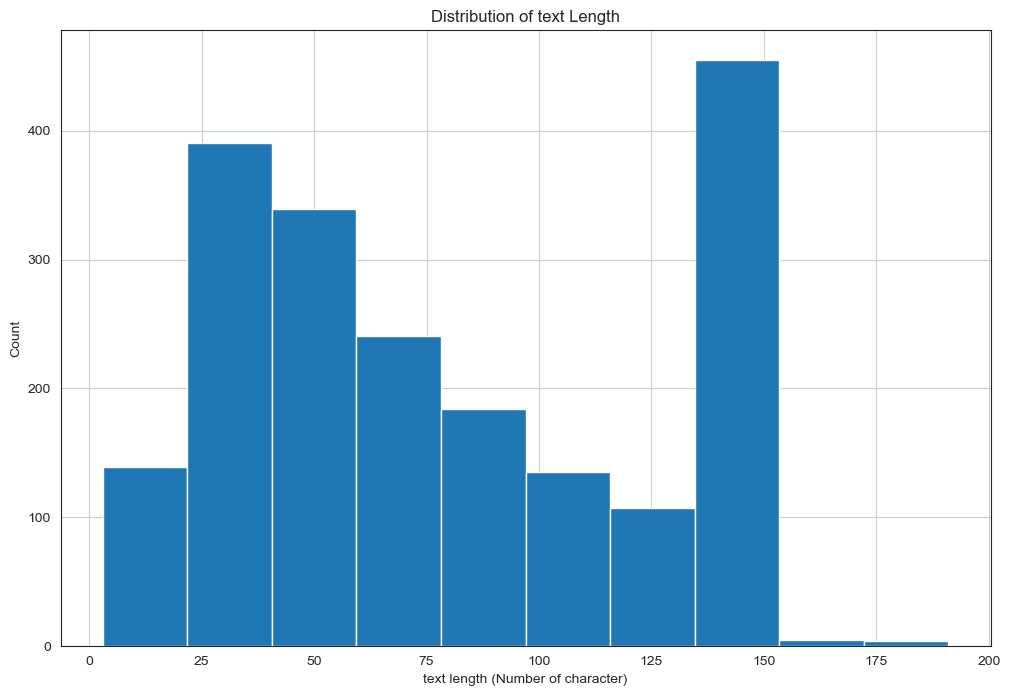

In [10]:
text_length = data["Text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

In [11]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data["Text"]= data["Text"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [12]:
## removing punctuation from review..#
import string
data["Text"]=data["Text"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

## Remove Numbers from tweets...##
data["Text"]=data["Text"].str.replace('[0-9]','')

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords = pd.read_csv('/content/stop(1).txt')
stop_words=stopwords.words('english')
data["Text"]=data["Text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_Text(Text):
    Text = Text.lower()
    Text = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Text = re.sub('\w*\d\w*', '', text)
    Text = re.sub("[0-9" "]+"," ",text)
    Text = re.sub('[‘’“”…]', '', text)
    
    return Text

clean = lambda x: clean_Text(x)

In [15]:
data.head(5)

,Text
0,kunalb11 im alien
1,idaacarmack ray tracing cyberpunk hdr nextleve...
2,joerogan spotify great interview
3,gtera27 doge underestimated
4,teslacn congratulations tesla china amazing ex...


In [16]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from textblob import Word
data["Text"]= data["Text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data["Text"]= data["Text"].apply(lambda x:(re.sub(pattern, '',x).strip()))
Text_set=data["Text"]

In [18]:
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(Text_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#text = remove_emoji(text_set)

In [19]:
def remove_emoji(Text_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data["Text"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(df)

      005  10  100  1000  10000  100kg  100m  107  10pm  10x  ...  zikryzamir  \
0       0   0    0     0      0      0     0    0     0    0  ...           0   
1       0   0    0     0      0      0     0    0     0    0  ...           0   
2       0   0    0     0      0      0     0    0     0    0  ...           0   
3       0   0    0     0      0      0     0    0     0    0  ...           0   
4       0   0    0     0      0      0     0    0     0    0  ...           0   
...   ...  ..  ...   ...    ...    ...   ...  ...   ...  ...  ...         ...   
1994    0   0    0     0      0      0     0    0     0    0  ...           0   
1995    0   0    0     0      0      0     0    0     0    0  ...           0   
1996    0   0    0     0      0      0     0    0     0    0  ...           0   
1997    0   0    0     0      0      0     0    0     0    0  ...           0   
1998    0   0    0     0      0      0     0    0     0    0  ...           0   

      zip2  zogfotpik  zon 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data["Text"])
print(TFIDF)

  (0, 249)	0.6623688405640785
  (0, 2811)	0.7491778954626188
  (1, 4669)	0.3503086432516702
  (1, 3277)	0.39490911009737484
  (1, 1781)	0.4162521748644735
  (1, 1017)	0.35842289988597426
  (1, 4646)	0.4162521748644735
  (1, 3745)	0.4162521748644735
  (1, 2546)	0.2703073340188711
  (2, 2662)	0.5043290017718325
  (2, 1709)	0.3080284702583498
  (2, 4264)	0.5704255952716918
  (2, 2733)	0.5704255952716918
  (3, 4819)	0.6108339384056402
  (3, 1176)	0.5037497388423235
  (3, 1729)	0.6108339384056402
  (4, 1369)	0.2876711653018475
  (4, 3276)	0.27277696499630993
  (4, 5100)	0.24937628204523501
  (4, 2831)	0.32114907525749786
  (4, 1397)	0.4094092137495757
  (4, 277)	0.3260835812455286
  (4, 779)	0.3525306208428504
  (4, 4491)	0.1828625922881543
  (4, 901)	0.3260835812455286
  :	:
  (1994, 4677)	0.2232488943707964
  (1994, 1522)	0.17157171851514066
  (1995, 158)	0.4008409077440879
  (1995, 814)	0.4008409077440879
  (1995, 4486)	0.36570555829866774
  (1995, 890)	0.38028804586878323
  (1995, 3593)

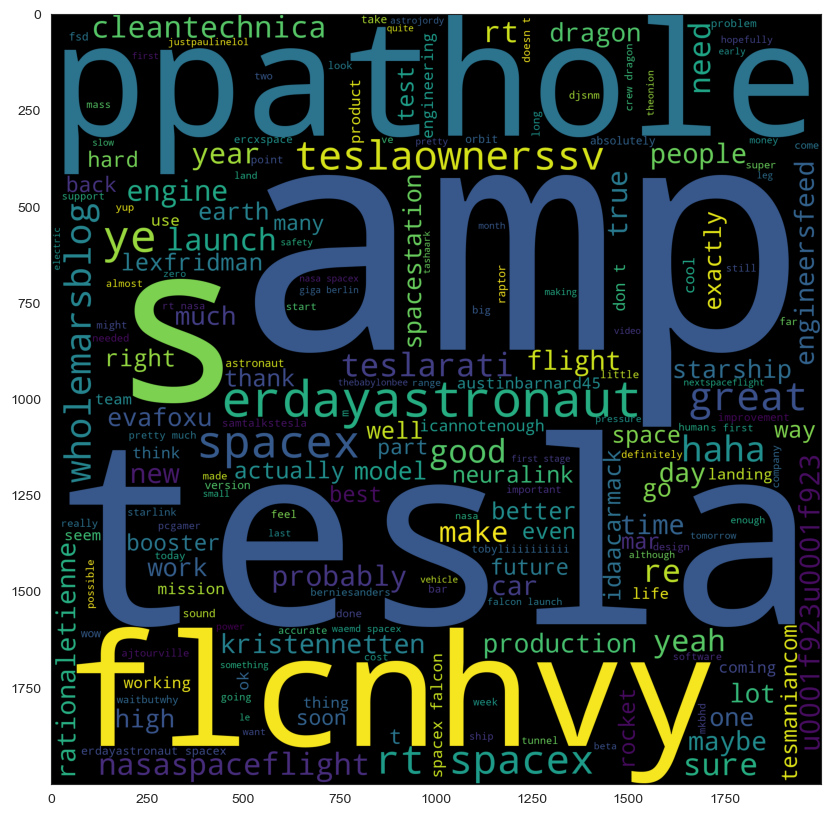

In [23]:
Review_wordcloud = ' '.join(data["Text"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [24]:
freq = pd.Series(' '.join(data["Text"]).split()).value_counts()[0:20]
freq

spacex             239
amp                218
tesla              169
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
its                56
launch              56
haha                55
nasaspaceflight     55
good                52
year                48
sure                43
make                41
Name: count, dtype: int64

In [25]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
from textblob import TextBlob
data['polarity'] = data["Text"].apply(lambda x: TextBlob(x).sentiment[0])
data[['Text','polarity']].head(5)

,Text,polarity
0,kunalb11 im alien,-0.25
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.00
2,joerogan spotify great interview,0.80
3,gtera27 doge underestimated,0.00
4,teslacn congratulation tesla china amazing exe...,0.20


In [27]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Text,polarity
2,joerogan spotify great interview,0.800000
4,teslacn congratulation tesla china amazing exe...,0.200000
5,happy new year ox httpstco9wfkmyu2oj,0.468182
7,owensparks flcnhvy anonyx10 haha thanks,0.200000
9,entertaining outcome likely,0.250000


In [28]:
def sent_type(Text): 
    for i in (Text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [29]:
sent_type(data['polarity'])

negative
neutral
positive
neutral
positive
positive
negative
positive
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
positive
neutral
positive
negative
negative
neutral
neutral
neutral
neutral
neutral
negative
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
neutral
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
neutral
neutral
negative
neutral
neutral
positive
neutral
neutral
positive
positive
neutral
neutral
positive
negative
neutral
neutral
positive
neutral
neutral
positive
negative
positive
positive
positive
neutral
neutral
neutral
positive
neutral
neutral
positive
positive
positive
neutral

In [30]:
data["category"]=data['polarity']

data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

data["category"]=data["category"].astype('category')
data.dtypes

Text          object
polarity     float64
category    category
dtype: object

<Axes: xlabel='category', ylabel='count'>

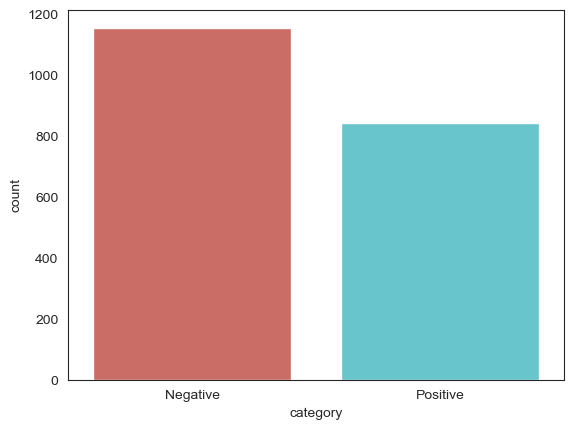

In [31]:
sns.countplot(x='category',data=data,palette='hls')

In [32]:
data.category.value_counts(normalize=True).mul(100)

category
Negative    57.778889
Positive    42.221111
Name: proportion, dtype: float64

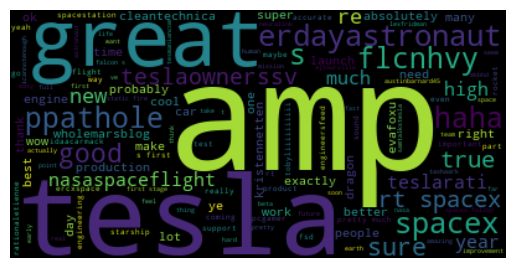

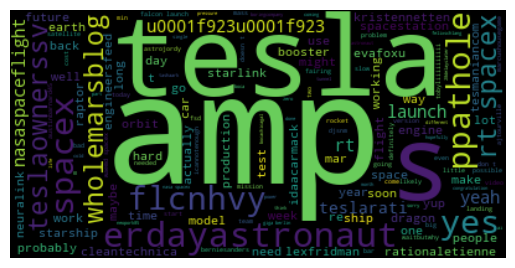

In [33]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Text.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Text.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

### Conclusion:-We have created work cloud on he is used in his text vary frequently that words are amp,great,tesla,spacex and according to sentiment probability the used 58% negative word & 42% positive word